In [2]:
import pandas as pd
import numpy as np
import logging

# Initialize logging
logging.basicConfig(filename='task_1.log', level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Starting Task 1 - Data Exploration')

# Load datasets
store_data_path = "C:/Users/user/Desktop/Github/Rossmann_Pharmaceuticals/Data/store.csv"
train_data_path = "C:/Users/user/Desktop/Github/Rossmann_Pharmaceuticals/Data/train.csv"

store_df = pd.read_csv(store_data_path)
train_df = pd.read_csv(train_data_path)

# Logging data loading
logging.info('Store and Training datasets loaded successfully')


C:\Users\user\AppData\Local\Temp\ipykernel_5720\1396985137.py:15: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_data_path)


In [4]:
# Check for missing values
missing_store_data = store_df.isnull().sum()
missing_train_data = train_df.isnull().sum()

# Log missing values
logging.info(f'Missing values in store dataset:\n{missing_store_data}')
logging.info(f'Missing values in train dataset:\n{missing_train_data}')

# Handling missing values (example: fill NA in competition-related columns with 0)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna(0, inplace=True)

# Log missing value treatment
logging.info('Missing values handled in store dataset')


C:\Users\user\AppData\Local\Temp\ipykernel_5720\2304152023.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_5720\2304152023.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [5]:
# Merge store dataset with training dataset on 'Store' column
merged_df = pd.merge(train_df, store_df, how='left', on='Store')

# Log merging operation
logging.info('Store and training datasets merged successfully')


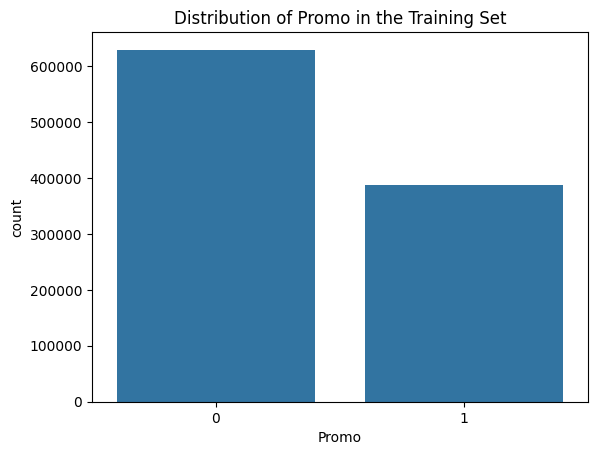

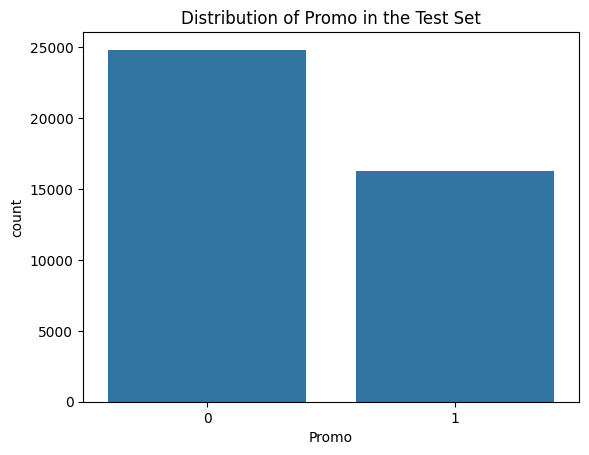

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load test dataset and compare with training set
test_data_path = "C:/Users/user/Desktop/Github/Rossmann_Pharmaceuticals/Data/test.csv"
test_df = pd.read_csv(test_data_path)
merged_test_df = pd.merge(test_df, store_df, how='left', on='Store')

# Distribution of Promo in training data
sns.countplot(data=merged_df, x='Promo')
plt.title('Distribution of Promo in the Training Set')
plt.show()
# Distribution of Promo in test set
sns.countplot(data=merged_test_df, x='Promo')
plt.title('Distribution of Promo in the Test Set')
plt.show()

# Log the comparison
logging.info('Analyzed and compared promo distribution in training and test sets')


    HolidayPeriod        Sales
0   After Holiday   791.207285
1  Before Holiday  4356.373187
2  During Holiday   213.718644
3      No Holiday  5943.370339


C:\Users\user\AppData\Local\Temp\ipykernel_5720\3450195696.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['StateHoliday'] = merged_df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})


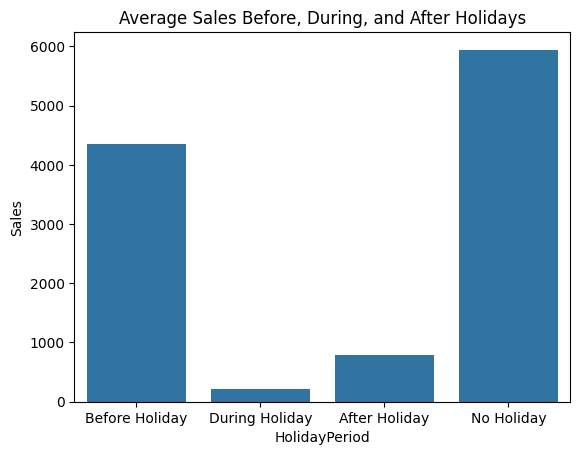

In [10]:
# Map 'StateHoliday' to standard values: 0 for No Holiday, 1 for Holiday
merged_df['StateHoliday'] = merged_df['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 1, 'c': 1})

# Set up default value for 'No Holiday'
merged_df['HolidayPeriod'] = 'No Holiday'

# Mark "During Holiday" where 'StateHoliday' is 1
merged_df.loc[merged_df['StateHoliday'] == 1, 'HolidayPeriod'] = 'During Holiday'

# Mark "Before Holiday" (shift forward by 1 day)
merged_df.loc[merged_df['StateHoliday'].shift(-1) == 1, 'HolidayPeriod'] = 'Before Holiday'

# Mark "After Holiday" (shift backward by 1 day)
merged_df.loc[merged_df['StateHoliday'].shift(1) == 1, 'HolidayPeriod'] = 'After Holiday'

# Now let's group by 'HolidayPeriod' to find the average sales
holiday_sales = merged_df.groupby('HolidayPeriod')['Sales'].mean().reset_index()

# Check if the categories "Before Holiday", "During Holiday", "After Holiday", and "No Holiday" exist in the result
print(holiday_sales)

# Plot the bar chart to compare sales before, during, and after holidays
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_sales, order=['Before Holiday', 'During Holiday', 'After Holiday', 'No Holiday'])
plt.title('Average Sales Before, During, and After Holidays')
plt.show()

logging.info('Analyzed sales behavior before, during, and after holidays')


Average Promotions During Christmas: 0.3225806451612903
Average Promotions During Easter: 0.0


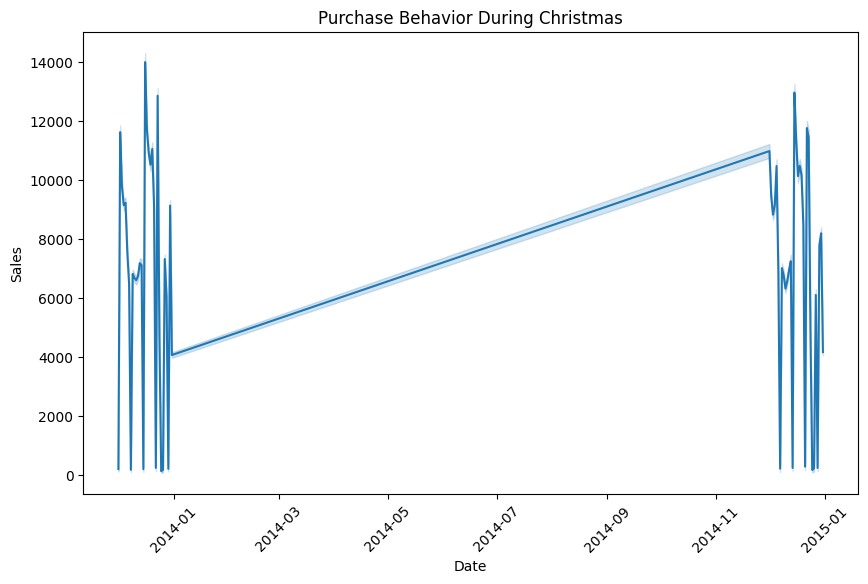

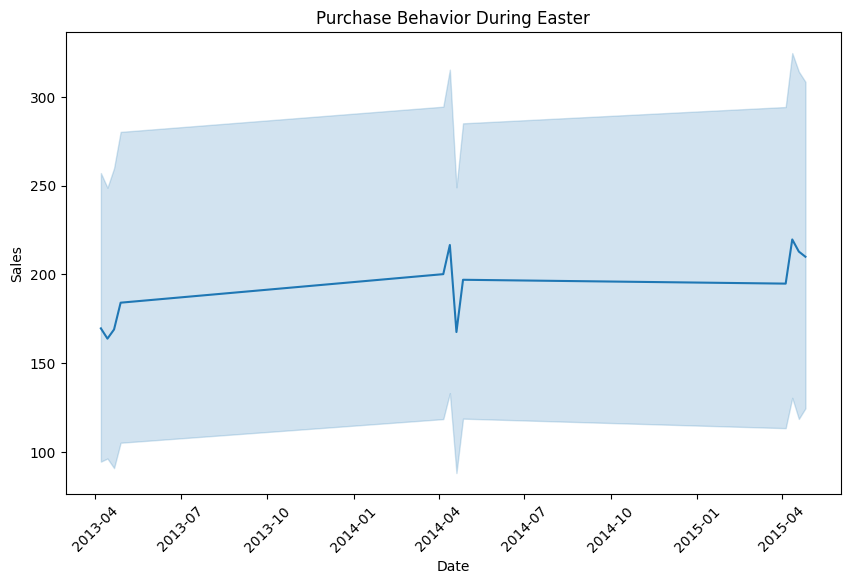

In [12]:
# Analyzing purchase behaviors during specific holidays like Christmas and Easter
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek  # Add this if not already present

# Filter for Christmas (December) and Easter (April, first Sunday)
christmas_sales = merged_df[merged_df['Month'] == 12]
easter_sales = merged_df[(merged_df['Month'] == 4) & (merged_df['DayOfWeek'] == 6)]  # Easter Sunday

# Analyze and visualize purchase behaviors
# You might want to also consider promotions or discounts during these periods
# For example, let's say we want to analyze promotions
christmas_promotions = merged_df[merged_df['Month'] == 12]['Promo'].mean()
easter_promotions = merged_df[(merged_df['Month'] == 4) & (merged_df['DayOfWeek'] == 6)]['Promo'].mean()

# Print out average promotions during these holidays
print(f"Average Promotions During Christmas: {christmas_promotions}")
print(f"Average Promotions During Easter: {easter_promotions}")

# Plot purchase behaviors (sales) during Christmas
plt.figure(figsize=(10, 6))
sns.lineplot(data=christmas_sales, x='Date', y='Sales')
plt.title('Purchase Behavior During Christmas')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot purchase behaviors (sales) during Easter
plt.figure(figsize=(10, 6))
sns.lineplot(data=easter_sales, x='Date', y='Sales')
plt.title('Purchase Behavior During Easter')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Logging the analysis of seasonal purchase behaviors
logging.info('Analyzed seasonal (Christmas and Easter) purchase behaviors, including sales and promotions.')


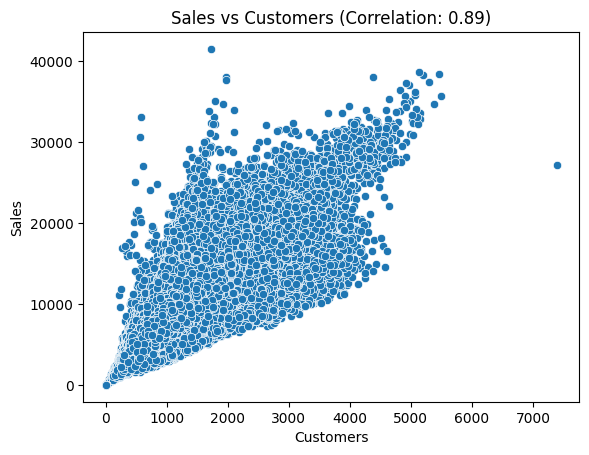

In [11]:
# Correlation between number of customers and sales
correlation = merged_df['Sales'].corr(merged_df['Customers'])

# Scatter plot to visualize the relationship
sns.scatterplot(data=merged_df, x='Customers', y='Sales')
plt.title(f'Sales vs Customers (Correlation: {correlation:.2f})')
plt.show()

# Log correlation result
logging.info(f'Correlation between Sales and Customers: {correlation}')


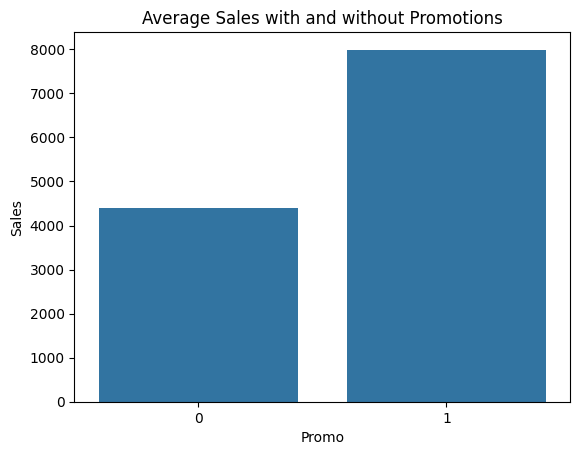

In [29]:
# Sales with and without promotions
promo_sales = merged_df.groupby('Promo')['Sales'].mean().reset_index()

# Bar plot of promo effect on sales
sns.barplot(data=promo_sales, x='Promo', y='Sales')
plt.title('Average Sales with and without Promotions')
plt.show()

# Log promo effect
logging.info('Analyzed the effect of promotions on sales')


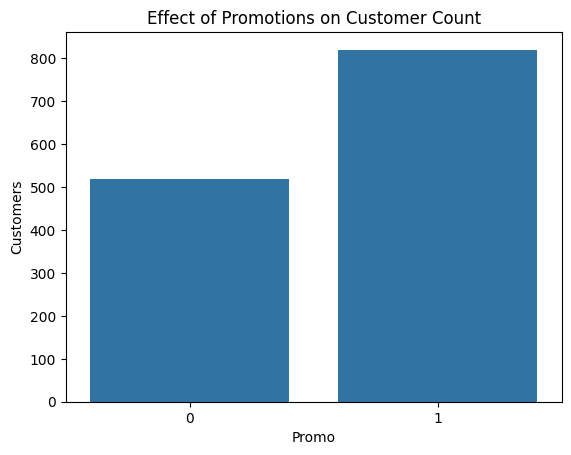

In [8]:
# Checking effect of promo on customer count
promo_customers = merged_df.groupby('Promo')['Customers'].mean().reset_index()
sns.barplot(data=promo_customers, x='Promo', y='Customers')
plt.title('Effect of Promotions on Customer Count')
plt.show()



logging.info('Analyzed if promos attract more customers')


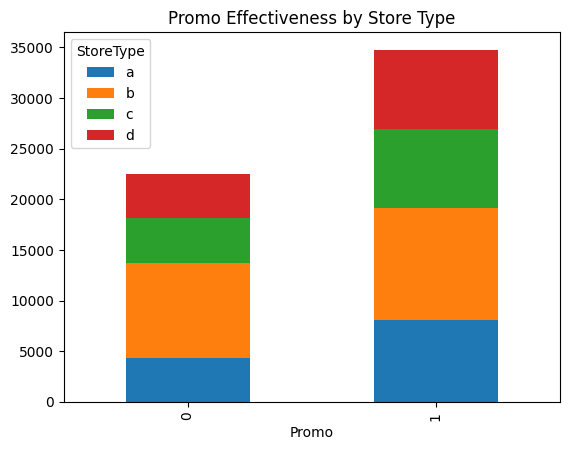

In [9]:
# Analyzing promo effect by store type or region (assuming store types are labeled in StoreType column)
promo_by_store = merged_df.groupby(['Promo', 'StoreType'])['Sales'].mean().unstack()
promo_by_store.plot(kind='bar', stacked=True)
plt.title('Promo Effectiveness by Store Type')
plt.show()

logging.info('Analyzed where promos could be more effective')


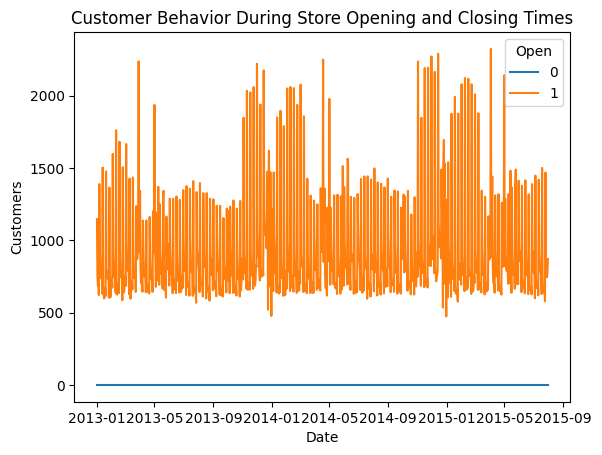

In [10]:
# Analyzing customer behavior during store opening/closing times (assuming 'Open' column indicates open status)
opening_sales = merged_df.groupby(['Open', 'Date'])['Customers'].mean().reset_index()
sns.lineplot(data=opening_sales, x='Date', y='Customers', hue='Open')
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.show()

logging.info('Analyzed customer trends during store opening/closing')


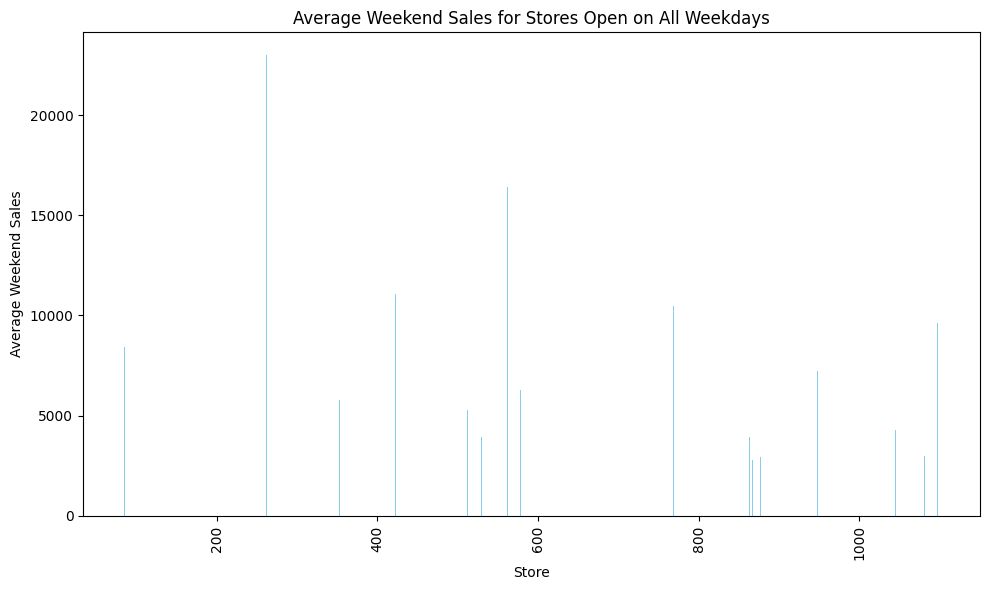

In [38]:
import matplotlib.pyplot as plt
import logging

# Analyze stores that are open on all weekdays
weekday_open_stores = merged_df[merged_df['Open'] == 1].groupby('Store')['DayOfWeek'].nunique()
open_all_week = weekday_open_stores[weekday_open_stores == 7].index  # Stores open every weekday

# Analyze weekend sales for these stores
weekend_sales = merged_df[(merged_df['Store'].isin(open_all_week)) & (merged_df['DayOfWeek'] >= 6)]
weekend_avg_sales = weekend_sales.groupby('Store')['Sales'].mean()

# Plot the average weekend sales
plt.figure(figsize=(10, 6))
plt.bar(weekend_avg_sales.index, weekend_avg_sales.values, color='skyblue')
plt.xlabel('Store')
plt.ylabel('Average Weekend Sales')
plt.title('Average Weekend Sales for Stores Open on All Weekdays')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

# Logging info
logging.info('Analyzed how store weekday opening affects weekend sales')


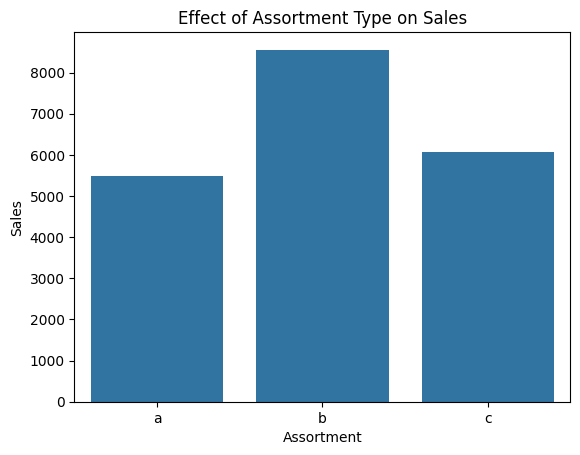

In [12]:
# Analyzing the effect of assortment type on sales
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean().reset_index()
sns.barplot(data=assortment_sales, x='Assortment', y='Sales')
plt.title('Effect of Assortment Type on Sales')
plt.show()

logging.info('Analyzed how assortment type affects sales')


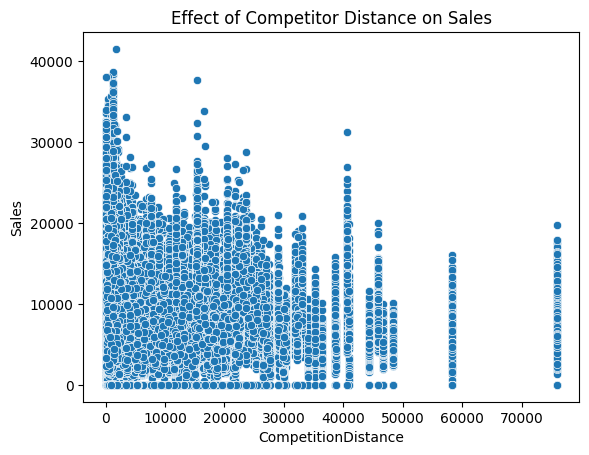

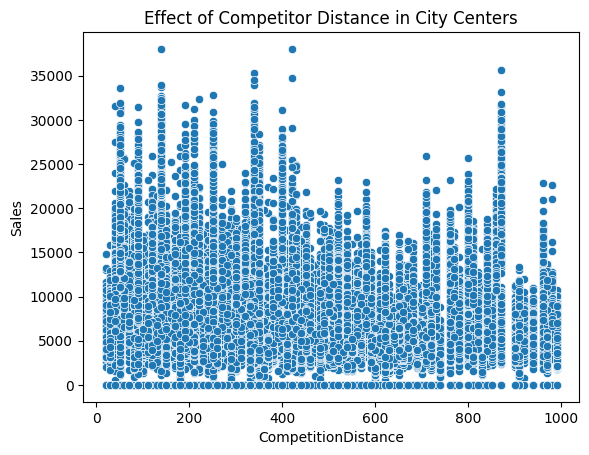

In [13]:
# Analyzing effect of competition distance on sales
sns.scatterplot(data=merged_df, x='CompetitionDistance', y='Sales')
plt.title('Effect of Competitor Distance on Sales')
plt.show()

# Assuming city centers can be identified (this can be adjusted)
city_center_stores = merged_df[merged_df['CompetitionDistance'] < 1000]  # Example: stores with competitors <1km
sns.scatterplot(data=city_center_stores, x='CompetitionDistance', y='Sales')
plt.title('Effect of Competitor Distance in City Centers')
plt.show()

logging.info('Analyzed the effect of competitor distance on sales')


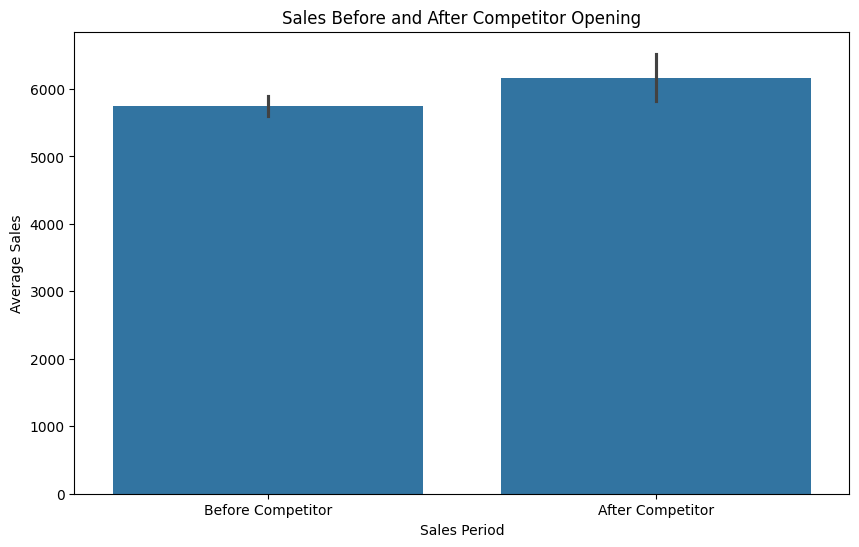

In [17]:
# Step 1: Filter stores that have information about competition opening or reopening
competitor_stores = store_df[(store_df['CompetitionDistance'].notna()) &
                             (store_df['CompetitionOpenSinceYear'] > 0)]

# Step 2: Merge the filtered store dataset with the training dataset
competitor_merged_df = pd.merge(train_df, competitor_stores, how='inner', on='Store')

# Step 3: Create a new 'CompetitionOpenDate' column
competitor_merged_df['CompetitionOpenDate'] = pd.to_datetime(
    dict(year=competitor_merged_df['CompetitionOpenSinceYear'],
         month=competitor_merged_df['CompetitionOpenSinceMonth'], day=1)
)

# Step 4: Analyze sales before and after the competition opening
competitor_merged_df['Date'] = pd.to_datetime(competitor_merged_df['Date'])

# Adding a column to determine if a sale occurred before or after the competitor opened
competitor_merged_df['Before_Competition'] = competitor_merged_df['Date'] < competitor_merged_df['CompetitionOpenDate']

# Step 5: Group by 'Store' and 'Before_Competition' to analyze the mean sales
competition_sales_analysis = competitor_merged_df.groupby(['Store', 'Before_Competition'])['Sales'].mean().reset_index()

# Step 6: Visualize sales before and after competitor opening
plt.figure(figsize=(10, 6))
sns.barplot(data=competition_sales_analysis, x='Before_Competition', y='Sales')
plt.title('Sales Before and After Competitor Opening')
plt.xticks([0, 1], labels=['Before Competitor', 'After Competitor'])
plt.ylabel('Average Sales')
plt.xlabel('Sales Period')
plt.show()

# Logging this step
logging.info('Analyzed the effect of competitor openings on store sales')


In [18]:
logging.info('Exploratory data analysis completed')
